In [175]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('merged_data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Unnamed: 0.1'], axis = 1)
df.head()

,Game_date,Games_played_to_date,BA,PA,Name,ISO,SLG,BABIP,BIP,OBP,...,strike_percentage,pitches_per_appearance_avg,ground_ball_percentage,fly_ball_percentage,strikeout_percentage,next_game_team1,next_game_team2,hitter_R%,hitter_L%,next_game_hit_vs_fp
0,2014-03-31,1,0.00000,4,Travis d'Arnaud,0.0,0.00000,0.00000,0.33333,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0
1,2014-03-31,1,0.20000,5,Jayson Werth,0.0,0.20000,0.33333,0.60000,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1
2,2014-03-31,1,0.25000,5,Ian Desmond,0.0,0.25000,0.25000,1.00000,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1
3,2014-03-31,1,0.25000,5,Bryce Harper,0.0,0.25000,0.50000,0.50000,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0
4,2014-03-31,1,0.33333,5,Adam LaRoche,1.0,1.33333,0.00000,1.00000,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1


In [177]:
train = df[['SLG','BABIP','BIP','OBP','Weather (Degrees)','Wind (MPH)','Innings_Pitched','Hits_Allowed', 'Earned_Runs_Allowed','ERA','hip_last_three','strikeout_percentage' ,'strike_percentage' ,'whip_season' ,'Strikes_Swinging']]
test = df[['next_game_HIT']]

In [178]:
trainB = df._get_numeric_data()
for i in df.columns:
    if str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.int64'>" or str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.float64'>" or isinstance(df.at[df[i].first_valid_index(), i], int) or isinstance(df.at[df[i].first_valid_index(), i], float):
        print (i)

Games_played_to_date
BA
PA
ISO
SLG
BABIP
BIP
OBP
OPS
LA_avg
LA_median
Walks
next_game_HIT
H_total_next_game
AB_next_game
Walks_next_game
AB_vs_first_pitcher
earliest_inning
first_pitcher_faced_next_game_id
hits_vs_first_pitcher
BA_last_10_games
BA_last_20_games
BA_last_30_games
BABIP_last_10_games
BABIP_last_20_games
BABIP_last_30_games
BIP_last_10_games
BIP_last_20_games
BIP_last_30_games
ISO_last_10_games
ISO_last_20_games
ISO_last_30_games
LAmed_last_10_games
LAmed_last_20_games
LAmed_last_30_games
OBP_last_10_games
OBP_last_20_games
OBP_last_30_games
OPS_last_10_games
OPS_last_20_games
OPS_last_30_games
PA_last_10_games
PA_last_20_games
PA_last_30_games
SLG_last_10_games
SLG_last_20_games
SLG_last_30_games
Walks_last_10_games
Walks_last_20_games
Walks_last_30_games
mlbam_code
Flare/Burner_lsa_p
SolidContact_lsa_p
Topped_lsa_p
Under_lsa_p
Barrel_lsa_p
Weak_lsa_p
CH_percentage_hits
CU_percentage_hits
EP_percentage_hits
FA_percentage_hits
FC_percentage_hits
FF_percentage_hits
FO_perce

In [179]:
for i in df.columns:
    if not (str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.int64'>" or str(type(df.at[df[i].first_valid_index(), i])) == "<class 'numpy.float64'>" or isinstance(df.at[df[i].first_valid_index(), i], int) or isinstance(df.at[df[i].first_valid_index(), i], float)):
        print (i)

Game_date
Name
next_game_date
HomeTeam
AwayTeam
Date_x
Team 1
Team 2
Venue
Weather Type
Wind Direction
Year_x
PARK NAME
PARKID
LEAGUE
CITY
Foul
Pitcher_Name
Pitcher_ID
Date_y
Team
At
Opponent
Result
Innings
Decision
Entered
Exited
name_last
name_first
key_retro
key_bbref
next_game_team1
next_game_team2


In [180]:
trainB = trainB.drop(['next_game_HIT'], axis = 1)
trainB = trainB.drop(['H_total_next_game'], axis = 1)
trainB = trainB.drop(['AB_next_game'], axis = 1)
trainB = trainB.drop(['Walks_next_game'], axis = 1)
trainB = trainB.drop(['next_game_hit_vs_fp'], axis = 1)
trainB = trainB.drop(['hits_vs_first_pitcher'], axis = 1)
trainB = trainB.drop(['Team 1 Score'], axis = 1)
trainB = trainB.drop(['Team 2 Score'], axis = 1)
trainB = trainB.drop(['Game_Score'], axis = 1)
trainB = trainB.drop(['Inherited_Score'], axis = 1)
trainB = trainB.drop(['key_fangraphs'], axis = 1)
trainB = trainB.drop(['first_pitcher_faced_next_game_id'], axis = 1)
trainB = trainB.drop(['YEAR'], axis = 1)
trainB = trainB.drop(['nYear'], axis = 1)
trainB = trainB.drop(['Year_y'], axis = 1)
trainB = trainB.drop(['key_mlbam'], axis = 1)
trainB = trainB.drop(['mlb_played_first'], axis = 1)
trainB = trainB.drop(['mlb_played_last'], axis = 1)
trainB = trainB.drop(['Game_Number'], axis = 1)
trainB = trainB.drop(['Team_Game_Number'], axis = 1)
trainB = trainB.join(pd.get_dummies(df['Weather Type'], prefix = 'Weather'))
trainB = trainB.join(pd.get_dummies(df['Wind Direction'], prefix = 'Wind'))
trainB = trainB.join(pd.get_dummies(df['PARKID'], prefix = 'Park'))

train.head()

,SLG,BABIP,BIP,OBP,Weather (Degrees),Wind (MPH),Innings_Pitched,Hits_Allowed,Earned_Runs_Allowed,ERA,hip_last_three,strikeout_percentage,strike_percentage,whip_season,Strikes_Swinging
0,0.00000,0.00000,0.33333,0.25,51,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.20000,0.33333,0.60000,0.20,51,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.25000,0.25000,1.00000,0.20,51,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.25000,0.50000,0.50000,0.40,51,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.33333,0.00000,1.00000,0.60,51,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
for i in train.columns:    
    if (train.shape[0] - train[i].count()) / train.shape[0] > .3:
        print (i)
        train = train.drop([i], axis = 1)

In [182]:
for i in trainB.columns:    
    if (trainB.shape[0] - trainB[i].count()) / trainB.shape[0] > .3:
        print (i)
        trainB = trainB.drop([i], axis = 1)

BA_last_30_games
BABIP_last_30_games
BIP_last_30_games
ISO_last_30_games
LAmed_last_20_games
LAmed_last_30_games
OBP_last_30_games
OPS_last_30_games
PA_last_30_games
SLG_last_30_games
Walks_last_30_games
EP_percentage_hits
FA_percentage_hits
FO_percentage_hits
FS_percentage_hits
KC_percentage_hits
KN_percentage_hits
SC_percentage_hits
pHitsByZone11
pHitsByZone12
pHitsByZone3
Inherited_Runners
hip_last_ten
wip_last_ten


In [183]:
for i in train.columns:
    if len(train[i].unique()) > 2:
        train[i] = train[i].fillna(train[i].median())
    else:
        train[i] = train[i].fillna(train[i].mode()[0])

C:\Users\Andrew\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
for i in trainB.columns:
    if len(trainB[i].unique()) > 2:
        trainB[i] = trainB[i].fillna(trainB[i].median())
    else:
        trainB[i] = trainB[i].fillna(trainB[i].mode()[0])

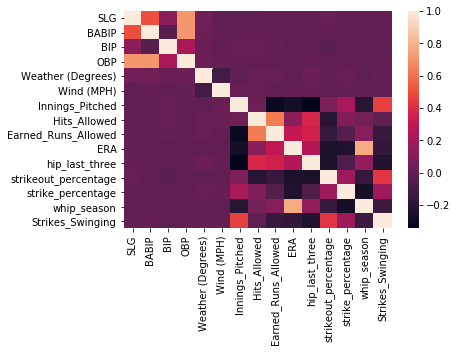

In [185]:
corr = train.corr()
sns.heatmap(corr)

In [186]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

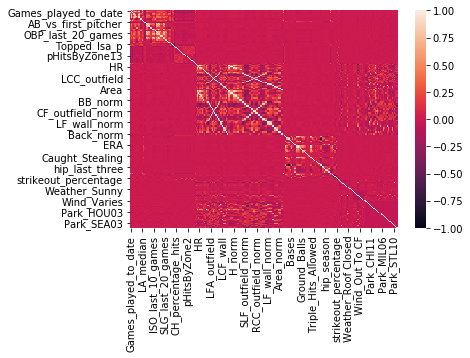

In [187]:
corr = trainB.corr()
sns.heatmap(corr)

In [188]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = trainB.columns[columns]
trainB = trainB[selected_columns]

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.20, shuffle = False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

logreg = LogisticRegression(max_iter = 3000)
logreg.fit(X_train, y_train.values.ravel())
predictions = logreg.predict(X_test)
print (precision_score(y_test, predictions))

0.6385108712654466


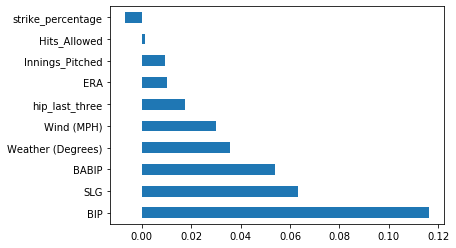

In [191]:
feat_importances = pd.Series(logreg.coef_[0], index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')

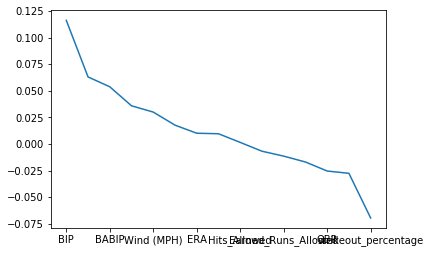

In [192]:
feat_importances.nlargest(len(feat_importances)).plot(kind='line')

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
print (precision_score(y_test, predictions))

0.6442647663423324


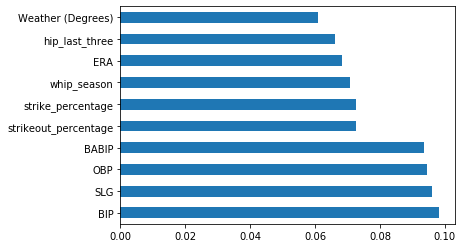

In [194]:
feat_importances = pd.Series(clf.feature_importances_, index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')

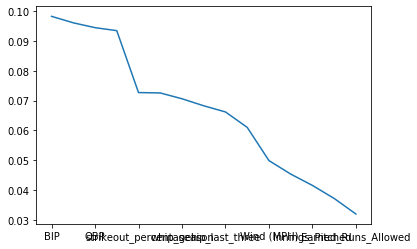

In [195]:
feat_importances.nlargest(len(feat_importances)).plot(kind='line')

In [196]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter= 3000)
mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)
print (precision_score(y_test, predictions))

0.6380781902612396


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(trainB, test, test_size = 0.20, shuffle = False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

logreg = LogisticRegression(max_iter = 3000)
logreg.fit(X_train, y_train.values.ravel())
predictions = logreg.predict(X_test)
print (precision_score(y_test, predictions))

0.6440618976226172


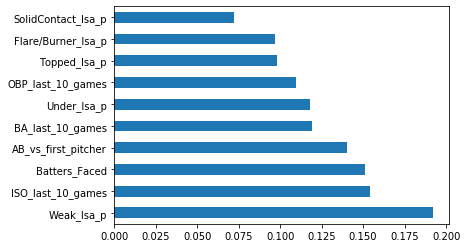

In [199]:
feat_importances = pd.Series(logreg.coef_[0], index=trainB.columns)
feat_importances.nlargest(10).plot(kind='barh')

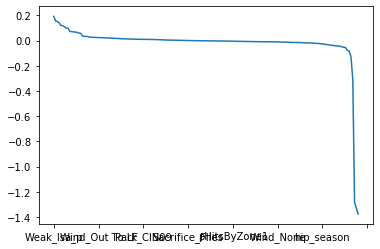

In [200]:
feat_importances.nlargest(len(feat_importances)).plot(kind='line')

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
predictions = clf.predict(X_test)
print (precision_score(y_test, predictions))

0.6461292368791197


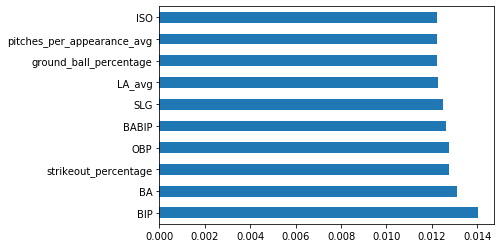

In [202]:
feat_importances = pd.Series(clf.feature_importances_, index=trainB.columns)
feat_importances.nlargest(10).plot(kind='barh')

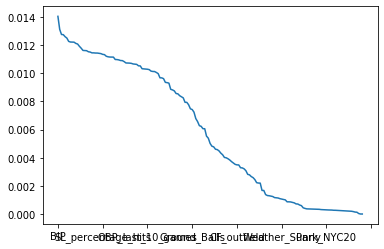

In [203]:
feat_importances.nlargest(len(feat_importances)).plot(kind='line')

In [204]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter= 5000)
mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)
print (precision_score(y_test, predictions))

0.6471834211128922


In [205]:
train = train.join(df['Name'])
train = train.join(df['next_game_HIT'])
names = train['Name'].unique().tolist()
temp = train['Name'].value_counts().to_frame()
temp = temp.reset_index()
temp.columns = ['Name', 'Count']
for i in range(len(temp)):
    if temp.at[i, 'Count'] < 30:
        names.remove(temp.at[i, 'Name'])

In [206]:
len(df['Name'].unique()) - len(names)

300

In [207]:
len(names) / len(df['Name'].unique()) 

0.7169811320754716

In [212]:
players = pd.DataFrame()

count = 0

for name in names:
    
    players.at[count, 'Name'] = name
    
    train2 = train[train['Name'] == name]
    train2 = train2.drop(['Name'], axis = 1)
    test2 = train2['next_game_HIT']
    train2 = train2.drop(['next_game_HIT'], axis = 1)
    
    players.at[count, 'Samples'] = train2.shape[0]
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    X_train, X_test, y_train, y_test = train_test_split(train2, test2, test_size = 0.20, shuffle = False)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_score
    lr = LogisticRegression(max_iter = 3000)
    lr.fit(X_train, y_train.values.ravel())
    predictions = lr.predict(X_test)
    players.at[count, 'LR'] = precision_score(y_test, predictions)
    print ('LR' + str(count))
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import precision_score
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train.values.ravel())
    predictions = clf.predict(X_test)
    players.at[count, 'RF'] = precision_score(y_test, predictions) 
    print ('RF' + str(count))
    
    count += 1
               
players.head()

LR0
RF0
LR1
RF1
LR2
RF2
LR3
RF3
LR4
RF4
LR5
RF5
LR6
RF6
LR7
RF7
LR8
RF8
LR9
RF9
LR10
RF10
LR11
RF11
LR12
RF12
LR13
RF13
LR14
RF14
LR15
RF15
LR16
RF16
LR17
RF17
LR18
RF18
LR19
RF19
LR20
RF20
LR21
RF21
LR22
RF22
LR23
RF23
LR24
RF24
LR25
RF25
LR26
RF26
LR27
RF27
LR28
RF28
LR29
RF29
LR30
RF30
LR31
RF31
LR32
RF32
LR33
RF33
LR34
RF34
LR35
RF35
LR36
RF36
LR37
RF37
LR38
RF38
LR39
RF39
LR40
RF40
LR41
RF41
LR42
RF42
LR43
RF43
LR44
RF44
LR45
RF45
LR46
RF46
LR47
RF47
LR48
RF48
LR49
RF49
LR50
RF50
LR51
RF51
LR52
RF52
LR53
RF53
LR54
RF54
LR55
RF55
LR56
RF56
LR57
RF57
LR58
RF58
LR59
RF59
LR60
RF60
LR61
RF61
LR62
RF62
LR63
RF63
LR64
RF64
LR65
RF65
LR66
RF66
LR67
RF67
LR68
RF68
LR69
RF69
LR70
RF70
LR71
RF71
LR72
RF72
LR73
RF73
LR74
RF74
LR75
RF75
LR76
RF76
LR77
RF77
LR78
RF78
LR79
RF79
LR80
RF80
LR81
RF81
LR82
RF82
LR83
RF83
LR84
RF84
LR85
RF85
LR86
RF86
LR87
RF87
LR88
RF88
LR89
RF89
LR90
RF90
LR91
RF91
LR92
RF92
LR93
RF93
LR94
RF94
LR95
RF95
LR96
RF96
LR97
RF97
LR98
RF98
LR99
RF99
LR100
RF100
LR101
RF

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF706
LR707
RF707
LR708
RF708
LR709
RF709
LR710
RF710
LR711
RF711
LR712
RF712
LR713
RF713
LR714
RF714
LR715
RF715
LR716
RF716
LR717
RF717
LR718
RF718
LR719
RF719
LR720
RF720
LR721
RF721
LR722
RF722
LR723
RF723
LR724
RF724
LR725
RF725
LR726
RF726
LR727
RF727
LR728
RF728
LR729
RF729
LR730
RF730
LR731
RF731
LR732
RF732
LR733
RF733
LR734
RF734
LR735
RF735
LR736
RF736
LR737
RF737
LR738
RF738
LR739
RF739
LR740


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF740
LR741
RF741
LR742
RF742
LR743
RF743
LR744
RF744
LR745
RF745
LR746
RF746
LR747
RF747
LR748
RF748
LR749
RF749
LR750
RF750
LR751
RF751
LR752
RF752
LR753
RF753
LR754
RF754
LR755
RF755
LR756
RF756
LR757
RF757
LR758
RF758
LR759
RF759


,Name,Samples,LR,RF
0,Travis d'Arnaud,365.0,0.718750,0.745763
1,Jayson Werth,376.0,0.605634,0.611111
2,Ian Desmond,649.0,0.661417,0.673077
3,Bryce Harper,728.0,0.640845,0.626866
4,Adam LaRoche,198.0,0.621622,0.687500


In [213]:
print ('LR: ' + str(players['LR'].mean()))
print ('RF: ' + str(players['RF'].mean()))

LR: 0.6185108595743614
RF: 0.6144808712488199


In [214]:
trainB = trainB.join(df['Name'])
trainB = trainB.join(df['next_game_HIT'])
names = trainB['Name'].unique().tolist()
temp = trainB['Name'].value_counts().to_frame()
temp = temp.reset_index()
temp.columns = ['Name', 'Count']
for i in range(len(temp)):
    if temp.at[i, 'Count'] < 30:
        names.remove(temp.at[i, 'Name'])

In [215]:
len(df['Name'].unique()) - len(names)

300

In [216]:
len(names) / len(df['Name'].unique()) 

0.7169811320754716

In [217]:
players = pd.DataFrame()

count = 0

for name in names:
    
    players.at[count, 'Name'] = name
    
    train2 = train[trainB['Name'] == name]
    train2 = train2.drop(['Name'], axis = 1)
    test2 = train2['next_game_HIT']
    train2 = train2.drop(['next_game_HIT'], axis = 1)
    
    players.at[count, 'Samples'] = train2.shape[0]
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    X_train, X_test, y_train, y_test = train_test_split(train2, test2, test_size = 0.20, shuffle = False)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_score
    lr = LogisticRegression(max_iter = 3000)
    lr.fit(X_train, y_train.values.ravel())
    predictions = lr.predict(X_test)
    players.at[count, 'LR'] = precision_score(y_test, predictions) 
    print ('LR' + str(count))
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import precision_score
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train.values.ravel())
    predictions = clf.predict(X_test)
    players.at[count, 'RF'] = precision_score(y_test, predictions)  
    print ('RF' + str(count))
    
    count += 1
               
players.head()

LR0
RF0
LR1
RF1
LR2
RF2
LR3
RF3
LR4
RF4
LR5
RF5
LR6
RF6
LR7
RF7
LR8
RF8
LR9
RF9
LR10
RF10
LR11
RF11
LR12
RF12
LR13
RF13
LR14
RF14
LR15
RF15
LR16
RF16
LR17
RF17
LR18
RF18
LR19
RF19
LR20
RF20
LR21
RF21
LR22
RF22
LR23
RF23
LR24
RF24
LR25
RF25
LR26
RF26
LR27
RF27
LR28
RF28
LR29
RF29
LR30
RF30
LR31
RF31
LR32
RF32
LR33
RF33
LR34
RF34
LR35
RF35
LR36
RF36
LR37
RF37
LR38
RF38
LR39
RF39
LR40
RF40
LR41
RF41
LR42
RF42
LR43
RF43
LR44
RF44
LR45
RF45
LR46
RF46
LR47
RF47
LR48
RF48
LR49
RF49
LR50
RF50
LR51
RF51
LR52
RF52
LR53
RF53
LR54
RF54
LR55
RF55
LR56
RF56
LR57
RF57
LR58
RF58
LR59
RF59
LR60
RF60
LR61
RF61
LR62
RF62
LR63
RF63
LR64
RF64
LR65
RF65
LR66
RF66
LR67
RF67
LR68
RF68
LR69
RF69
LR70
RF70
LR71
RF71
LR72
RF72
LR73
RF73
LR74
RF74
LR75
RF75
LR76
RF76
LR77
RF77
LR78
RF78
LR79
RF79
LR80
RF80
LR81
RF81
LR82
RF82
LR83
RF83
LR84
RF84
LR85
RF85
LR86
RF86
LR87
RF87
LR88
RF88
LR89
RF89
LR90
RF90
LR91
RF91
LR92
RF92
LR93
RF93
LR94
RF94
LR95
RF95
LR96
RF96
LR97
RF97
LR98
RF98
LR99
RF99
LR100


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF100
LR101
RF101
LR102
RF102
LR103
RF103
LR104
RF104
LR105
RF105
LR106
RF106
LR107
RF107
LR108
RF108
LR109
RF109
LR110
RF110
LR111
RF111
LR112
RF112
LR113
RF113
LR114
RF114
LR115
RF115
LR116
RF116
LR117
RF117
LR118
RF118
LR119
RF119
LR120
RF120
LR121
RF121
LR122
RF122
LR123
RF123
LR124
RF124
LR125
RF125
LR126
RF126
LR127
RF127
LR128
RF128
LR129
RF129
LR130
RF130
LR131
RF131
LR132
RF132
LR133
RF133
LR134
RF134
LR135
RF135
LR136
RF136
LR137
RF137
LR138
RF138
LR139
RF139
LR140
RF140
LR141
RF141
LR142
RF142
LR143
RF143
LR144
RF144
LR145
RF145
LR146
RF146
LR147
RF147
LR148
RF148
LR149
RF149
LR150
RF150
LR151
RF151
LR152
RF152
LR153
RF153
LR154
RF154
LR155
RF155
LR156
RF156
LR157
RF157
LR158
RF158
LR159
RF159
LR160
RF160
LR161
RF161
LR162
RF162
LR163
RF163
LR164
RF164
LR165
RF165
LR166
RF166
LR167
RF167
LR168
RF168
LR169
RF169
LR170
RF170
LR171
RF171
LR172
RF172
LR173
RF173
LR174
RF174
LR175
RF175
LR176
RF176
LR177
RF177
LR178
RF178
LR179
RF179
LR180
RF180
LR181
RF181
LR182
RF182
LR183
RF18

C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF740
LR741
RF741
LR742


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF742
LR743
RF743
LR744
RF744
LR745
RF745
LR746
RF746
LR747
RF747
LR748
RF748
LR749
RF749
LR750
RF750
LR751
RF751
LR752


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF752
LR753
RF753
LR754
RF754
LR755
RF755
LR756
RF756
LR757
RF757
LR758
RF758
LR759
RF759


,Name,Samples,LR,RF
0,Travis d'Arnaud,365.0,0.718750,0.741935
1,Jayson Werth,376.0,0.605634,0.590909
2,Ian Desmond,649.0,0.661417,0.690909
3,Bryce Harper,728.0,0.640845,0.634328
4,Adam LaRoche,198.0,0.621622,0.625000


In [218]:
print ('LR: ' + str(players['LR'].mean()))
print ('RF: ' + str(players['RF'].mean()))

LR: 0.6185108595743614
RF: 0.6162577049719882
